<h1> VSB Power Line Fault Detection <h1>

<h2> 1. Business Problem <h2>
<p style='font-size:18px'><b> Description </b></p>

Medium voltage overhead power lines run for hundreds of miles to supply power to cities. These great distances make it expensive to manually inspect the lines for damage that doesn't immediately lead to a power outage, such as a tree branch hitting the line or a flaw in the insulator. These modes of damage lead to a phenomenon known as partial discharge — an electrical discharge which does not bridge the electrodes between an insulation system completely. Partial discharges slowly damage the power line, so left unrepaired they will eventually lead to a power outage or start a fire.
<br>

The challenge here is to detect partial discharge patterns in signals acquired from these power lines with a new meter designed at the ENET Centre at VŠB. Effective classifiers using this data will make it possible to continuously monitor power lines for faults.
<br>

ENET Centre researches and develops renewable energy resources with the goal of reducing or eliminating harmful environmental impacts. Their efforts focus on developing technology solutions around transportation and processing of energy raw materials.
<br>

By developing a solution to detect partial discharge maintenance costs will be reduced, and power outages will be prevented.
<br>

<b> Source: </b> https://www.kaggle.com/c/vsb-power-line-fault-detection/overview

<h3> 1.1 Real World/ Business Objectives and Constraints </h3>

1. Need to predict the PD-pattern very accurately with high Mathew Correlation Coefficient (MCC) value
2. Cost of failure to detect the PD-pattern is very severe as it might start a fire or affect livelihood of many because of power outage
3. No strict latency constraints. The models can take a few seconds, upto a minute to give the output.

<h2> 2. Machine Learning Problem </h2>



<h3> 2.1 Data </h3>

The data is provided in the following files:
1. metadata_train.csv & metadata_test.csv - It contains the following columns:
  *   id_measurement - id code of the trio of signals recorded at the same time
  *   signal_id - id for each signal which is unique for both train and test data. First id in train data is '0', while the first id in test data is '8712'
  *   phase - phase id code of each signal. It takes values of 1, 2, or 3
  *   target - 0 if the power line is undamaged, 1 if there is a fault.
2. train.parquet & test.parquet
  *   Each column contains one signal of 800,000 int8 measurements. 
  *   There are a total of 9712 number of signals (columns) in the training data
  *   Total size of training data is (800,000 x 9712)

<b> Source: </b> https://www.kaggle.com/c/vsb-power-line-fault-detection/data



<h3> 2.2 Machine Learning Problem Statement </h3>

The objective is to detect the Partial Discharge (PD) pattern  present in the 3-phase AC medium voltage signal. 

* If PD-pattern present in the signal - classified as 1 
* If PD-pattern not present in the signal - classified as 0

Therefore, this is a Binary Classification Problem.


<h3> 2.2 Performance Metric </b>

<p> Matthews Correlation Coefficient (MCC) is used as the performance metric.</p>

MCC measures the correlation between the predicted and the actual values of the output. MCC values range from -1 to 1.
*  If MCC=-1: Predicted and Actual values are highly uncorrelated and are in complete disagreement.
*  If MCC=1: Predicted and Actual values are highly correlated and are in complete agreement.
*  If MCC=0: Correlation is equivalent to random prediction.

Formula for MCC is as shown below:
>$MCC = \frac{(TP * TN) - (FP * FN)}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}} $

<b> Source: </b> https://www.kaggle.com/c/vsb-power-line-fault-detection/overview/evaluation

<h3> 2.3 Resources </b>

*  [A Complex Classification Approach of Partial Discharges from Covered Conductors in Real Environment](https://www.dropbox.com/s/2ltuvpw1b1ms2uu/A%20Complex%20Classification%20Approach%20of%20Partial%20Discharges%20from%20Covered%20Conductors%20in%20Real%20Environment%20%28preprint%29.pdf?dl=0) (Shared by competition host)


# Load data from Kaggle

In [ ]:
# https://stackoverflow.com/questions/49310470/using-kaggle-datasets-in-google-colab
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suhasaithal","key":"c87c41921fe9344b9c854878138972be"}'}

In [ ]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Nov 24 04:47 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download data from Kaggle using its API
!kaggle competitions download -c vsb-power-line-fault-detection

  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 60.6MB/s]
100% 6.97G/6.97G [04:14<00:00, 46.7MB/s]
100% 6.97G/6.97G [04:14<00:00, 29.4MB/s]
  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 82.6MB/s]
  0% 0.00/115k [00:00<?, ?B/s]
100% 115k/115k [00:00<00:00, 102MB/s]
100% 3.02G/3.02G [02:18<00:00, 18.5MB/s]
100% 3.02G/3.02G [02:18<00:00, 23.4MB/s]


In [ ]:
# https://stackoverflow.com/questions/49685924/extract-google-drive-zip-from-google-colab-notebook
# !unzip /content/train.parquet.zip
# !unzip /content/test.parquet.zip

# Load Libraries

In [ ]:
!sudo apt-get install libsnappy-dev
!pip install python-snappy
!pip install fastparquet
!pip install kneed

# https://github.com/raphaelvallat/entropy/issues/4#issue-533857629
!pip install git+https://github.com/raphaelvallat/entropy.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libsnappy-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 27.2 kB of archives.
After this operation, 108 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsnappy-dev amd64 1.1.7-1 [27.2 kB]
Fetched 27.2 kB in 1s (36.4 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libsnappy-dev:amd64.
(Reading database ... 144793 files and

In [ ]:
import numpy as np
import pandas as pd
import dask as dd
import pyarrow.parquet as pq
import pyarrow as pa
import os
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from scipy.stats import norm, skew

import gc
import pywt
from statsmodels.robust import mad
import scipy
from scipy import signal
from scipy.signal import butter
from scipy.signal import find_peaks, peak_widths, peak_prominences

from datetime import datetime

from scipy.signal import periodogram
from sklearn.neighbors import KDTree

from keras.layers import *
from keras.models import *
from keras import backend as K # The backend gives us access to tensorflow operations and allow us to create attention class
from keras import optimizers # Allows to access Adam class and modify some parameters
from keras.callbacks import * # This object helps the model to train in a smarter way, avoid overfitting
from keras import activations
from keras import regularizers
from keras import initializers
from keras import constraints
from keras.utils.vis_utils import plot_model
import tensorboard
%load_ext tensorboard
import tensorflow.compat.v1 as tf

# https://stackoverflow.com/a/56569206/4699076
tf.disable_eager_execution()

from sklearn.model_selection import GridSearchCV, StratifiedKFold

import concurrent.futures
import multiprocessing
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import SGDRegressor
from IPython.display import Image
from sklearn.metrics import matthews_corrcoef
import numba
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

import scipy.stats as stats
import pylab
from sklearn.ensemble import RandomForestClassifier
import random
import pickle
from sklearn.metrics import log_loss
from entropy import *
from prettytable import PrettyTable
import lightgbm as lgb

from sklearn.preprocessing import OneHotEncoder
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
from google.colab import output
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Assignment_29-VSB_Power_Line/'
test_path = '/content/drive/My Drive/Colab Notebooks/Assignment_29-VSB_Power_Line/test_path'

# Read Data

In [ ]:
metadata_train = pd.read_csv("/content/metadata_train.csv")
metadata_test = pd.read_csv("/content/metadata_test.csv")

# train = pd.read_parquet('/content/train.parquet', engine='fastparquet')
# test = pd.read_parquet('/content/test.parquet', engine='fastparquet')

# EDA

#### Check NA & Null

In [ ]:
print("Number of Null values in the train-metadata:\n", metadata_train.isnull().sum())
print("\nNumber of NA values in the train-metadata:\n",metadata_train.isna().sum())

Number of Null values in the train-metadata:
 signal_id         0
id_measurement    0
phase             0
target            0
dtype: int64

Number of NA values in the train-metadata:
 signal_id         0
id_measurement    0
phase             0
target            0
dtype: int64


In [ ]:
print("Number of Null values in the test-metadata:\n", metadata_test.isnull().sum())
print("\nNumber of NA values in the test-metadata:\n",metadata_test.isna().sum())

Number of Null values in the test-metadata:
 signal_id         0
id_measurement    0
phase             0
dtype: int64

Number of NA values in the test-metadata:
 signal_id         0
id_measurement    0
phase             0
dtype: int64


The data is clean as there are no NA or Null values.

#### target

* 0 - power line undamaged
* 1 - power line damaged

In [ ]:
print("Unique \'target\' values: {}".format(set(metadata_train['target'].values)))
print("Number of unique values of target:\n{}".format(metadata_train['target'].value_counts()))

Unique 'target' values: {0, 1}
Number of unique values of target:
0    8187
1     525
Name: target, dtype: int64


##### Below plot gives an idea of the distribution of the output classes

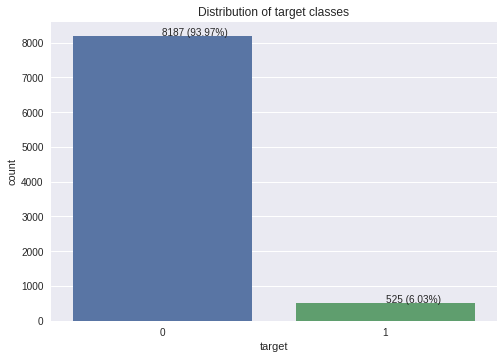


Imbalance ratio is 15.594285714285714


In [ ]:
splot = sns.countplot(x='target', data=metadata_train)

# https://github.com/mwaskom/seaborn/issues/1582
for ind, p in enumerate(splot.patches):
  percent = np.round((metadata_train[metadata_train['target']==ind].shape[0]/metadata_train['target'].shape[0])*100, 2)
  splot.annotate(str(metadata_train[metadata_train['target']==ind].shape[0]) + f" ({percent}%)", 
                 (p.get_x()+p.get_width()/2, p.get_height()))
plt.title("Distribution of target classes")
plt.show()
print(f"\nImbalance ratio is {metadata_train[metadata_train['target']==0].shape[0]/metadata_train[metadata_train['target']==1].shape[0]}")

Observations:
* The target classes are highly unbalanced. 
  * 93.97% (8187) of the total data (8712) is of class 0.
  * 6.03% (525) of the total data (8712) is of class 1.
  * Imbalance ratio refers to the number of data points in class 0 is to the number of data points in class 1. In our case the imbalance ratio is close to 15.6 which means that the data points of class 1 has to be repeated 15.6 times to make it equal to the number of data points of class 0 of 8712.

Conclusion:
* Following techniques can be used to handle the data imbalance:
  * Oversampling - In this case the signals with target=1 has to be repeated with new signal ids to balance the dataset.
  * Stratified split - Here the balancing of the data is not done, but the distribution of the data is maintained while performing Cross-validation.

#### id_measurement

* id_measurement refers to the ID code for trio of signals recorded at same time.
* Each id_measurement has 3 signals each belonging to phase 0, phase 1, and phase 2.

In [ ]:
print("Number of unique measurements done on all 3 phases of the signal: {}".format(len(metadata_train['id_measurement'].value_counts())))

Number of unique measurements done on all 3 phases of the signal: 2904


#### phase

##### Represents the phase of the signal.

In [ ]:
print("Signal contains the following phases: {}".format(list(set(metadata_train['phase'].values))))
print("Count of each phase is as follows:\n{}".format(metadata_train['phase'].value_counts()))

Signal contains the following phases: [0, 1, 2]
Count of each phase is as follows:
2    2904
1    2904
0    2904
Name: phase, dtype: int64


**Raw data of the signal is present in train DataFrame**

In [ ]:
print("Size of the signal data: {}".format(train.shape))
train.head()

Size of the signal data: (800000, 8712)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8672,8673,8674,8675,8676,8677,8678,8679,8680,8681,8682,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,18,1,-19,-16,-5,19,-15,15,-1,-16,-9,23,-1,-17,16,-8,17,-10,21,-8,-12,-7,23,-15,-20,13,4,-20,1,15,13,-2,-17,5,16,-20,9,-16,7,10,...,19,17,-16,-5,1,19,-18,1,13,-19,6,12,-18,-8,18,-9,19,-7,-12,-1,-3,-3,-19,8,3,-12,18,-6,-11,-5,18,-22,12,8,13,6,-21,-15,-9,20
1,18,0,-19,-17,-6,19,-17,16,0,-15,-10,22,0,-16,17,-7,17,-10,20,-9,-12,-7,24,-14,-20,14,4,-20,1,15,14,-3,-18,5,16,-20,9,-15,7,9,...,19,23,-13,0,0,19,-19,0,13,-20,7,12,-17,-8,17,-9,19,-7,-12,0,-1,-2,-18,10,6,-10,18,-5,-12,-7,17,-21,12,8,14,7,-19,-15,-8,21
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,-10,22,-1,-16,17,-9,16,-11,20,-8,-12,-6,24,-14,-20,13,4,-20,1,15,11,-3,-18,5,16,-20,8,-16,7,10,...,19,12,-18,-6,-1,19,-19,0,14,-20,5,12,-17,-8,17,-9,18,-10,-14,1,-1,-1,-17,11,4,-10,19,-5,-12,-9,16,-21,13,8,15,8,-18,-14,-8,22
3,18,1,-19,-16,-5,20,-16,16,0,-15,-9,22,-1,-17,17,-7,18,-9,21,-8,-12,-5,25,-14,-21,14,4,-20,1,15,14,-3,-17,5,16,-20,8,-16,7,10,...,19,21,-15,-3,0,19,-19,0,14,-18,4,11,-18,-9,16,-10,19,-9,-13,1,-1,-2,-19,8,3,-9,19,-4,-13,-9,16,-21,12,8,15,8,-19,-14,-7,23
4,18,0,-19,-16,-5,20,-17,16,-2,-14,-8,24,-2,-17,16,-9,16,-11,20,-8,-13,-6,24,-13,-21,14,4,-20,1,15,14,-3,-18,4,16,-21,8,-16,7,10,...,19,19,-14,-2,1,19,-18,2,14,-18,5,12,-18,-9,16,-10,19,-8,-13,-1,-2,-2,-18,9,5,-9,20,-4,-12,-8,17,-22,12,8,15,8,-18,-14,-8,23


##### Representation of each phase with respect to target=1 and target=0.

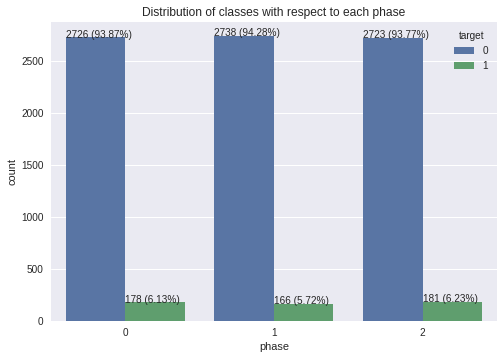

In [ ]:
splot = sns.countplot(x="phase", data=metadata_train, hue="target")
# Get the total number of signals present in each phase 
total_phases = metadata_train[metadata_train['phase']==0].shape[0]
num_points = []

# https://github.com/mwaskom/seaborn/issues/1582
for ind, p in enumerate(splot.patches):
  # Phase=[0,1,2] for indices [0,1,2] and indices [3,4,5] respectively
  phase = ind%3
  # target=[0,1] for indices [0,1], [2,3], [4,5] respectively
  tar = ind//3
  # Store the number of data points for the respective phase and target
  num_points.append(metadata_train.loc[(metadata_train['target']==tar) & (metadata_train['phase']==phase)]['phase'].shape[0])
  # Get the percentage of the number of data points
  num_phase_percent = np.round((num_points[-1]/total_phases)*100, 2)
  # Annotate the bar plot
  splot.annotate(str(num_points[-1])+f" ({num_phase_percent}%)", (p.get_x(), p.get_height()))
plt.title("Distribution of classes with respect to each phase")
plt.show()

In [ ]:
# Store the imbalance ratio values of each phase
avg_imb = []
for ind in range(len(num_points)//2):
  avg_imb.append(np.round((num_points[ind]/num_points[ind+3]),2))
  print(f"Ratio of number of points in class {ind%2} of phase {phase} to number of points in class {(ind+1)%2} of phase {ind%3} is: {avg_imb[-1]}")
print(f"Average imbalance ratio is {np.round(np.sum(avg_imb)/len(avg_imb), 2)}")

Ratio of number of points in class 0 of phase 2 to number of points in class 1 of phase 0 is: 15.31
Ratio of number of points in class 1 of phase 2 to number of points in class 0 of phase 1 is: 16.49
Ratio of number of points in class 0 of phase 2 to number of points in class 1 of phase 2 is: 15.04
Average imbalance ratio is 15.61


Observations:
* Imbalanceness nature of the data is reflected in each phase of the signal.
  * Phase 0
    * 93.87% (2726) of all the phase 0 data (2904) is of class 0
    * 6.13% (178) of all the phase 0 data (2904) is of class 1
    * Imbalance ratio approximated to 2 decimal points is 15.31
  * Phase 1
    * 94.28% (2738) of all the phase 0 data (2904) is of class 0
    * 5.72% (166) of all the phase 0 data (2904) is of class 1
    * Imbalance ratio approximated to 2 decimal points is 15.49
  * Phase 2
    * 93.77% (2723) of all the phase 0 data (2904) is of class 0
    * 6.23% (181) of all the phase 0 data (2904) is of class 1
    * Imbalance ratio approximated to 2 decimal points is 15.04
  * Target imbalance ratio is 15.59
* However, the imbalance ratio of each phase is different indicating that the partial discharge pattern need not always be observed in all the 3 phases of the signal. 
* If the partial discharge pattern was to be observed in all the 3 phases of the signal all the time, then the imbalance ratio of each phase of the signal should have been equal to the imbalance ratio of the target (15.59)
* Small deviation in the imbalance ratio of each phase with respect to the imbalance ratio of the target implies that there are some very few measurement ids where in some of the phases of the signal of that measurement id does not show partial discharge pattern while the other phases of the signal show the pattern.
* The deviation of the imbalance ratio from the target imbalance ratio is more in phase 2, followed by phase 0 and phase 1 respectively.
* Amongst the 3 phases, the partial discharge pattern is observed highest in phase 2, followed by phase 0 and phase 1 respectively.

##### Plot of all 3 phases (phase 0, phase 1, phase 2) of the signal with signal ids 0, 1, 2 where all the signals represent the signal of the undamaged power line.

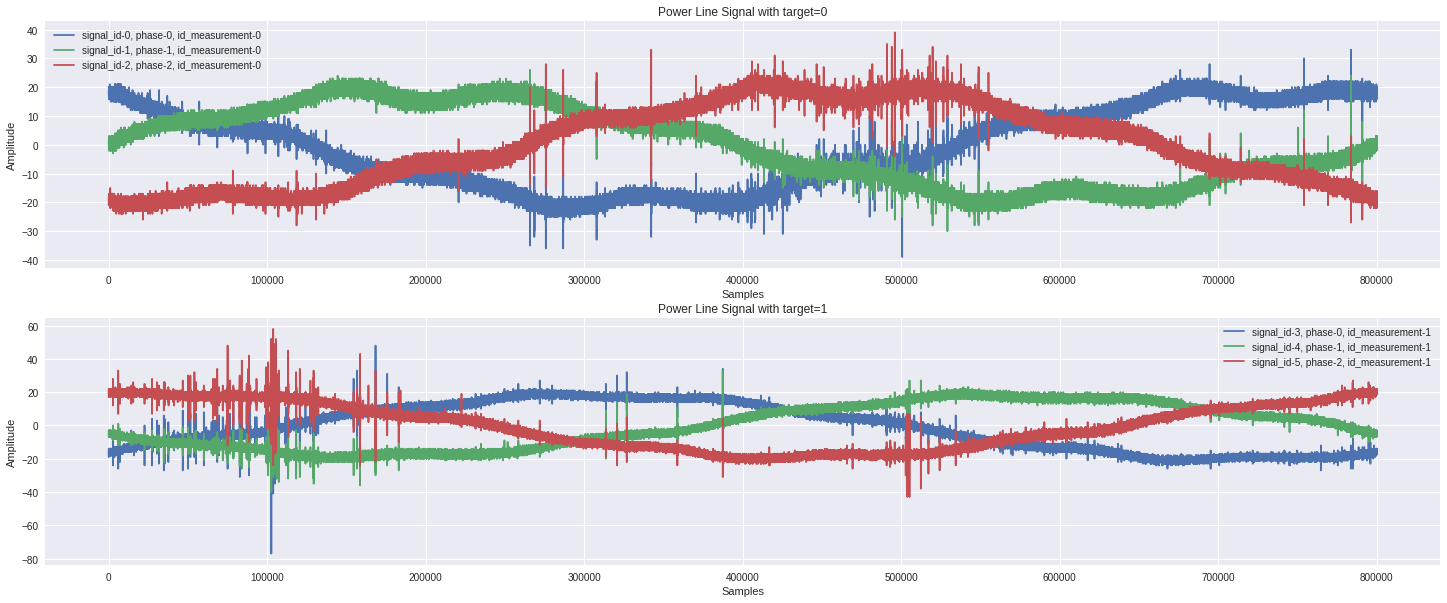

In [ ]:
sig_list = metadata_train.head(6).values

plt.figure(figsize=(25,10))
n_rows = 2
n_cols = 1
for ind, val in enumerate(sig_list):
  plt.subplot(n_rows, n_cols, (ind//3)+1)
  plt.plot(train[str(val[0])], label=f"signal_id-{val[0]}, phase-{val[2]}, id_measurement-{val[1]}")
  plt.legend()
  plt.title(f'Power Line Signal with target={val[3]}')
  plt.xlabel('Samples')
  plt.ylabel('Amplitude')
plt.show()

Observations:
*  Periodicity of each signal is clearly visible in the plots.
*  Phase shift of all the signals in each measurement id is also clearly visible.
*  All the signals are not smooth and are extremely noisy.
*  Fluctuations of the signal is very high at some points as compared to the other points.

##### Select the signals of target=0 and target=1 separately randomly from the training data and plot the same.

Following plots will give us some idea as to how the signals with target=0 and target=1 look like.

In [ ]:
def rand_plot(target_val, no_signals):
  """
  Select the signals of the given class randomly from the training data and 
  plot the same. 

  Parameters
  ----------
  target_val : int
    The class of the signal from where the signals are to be selected randomly.
    target_val should be 0 or 1.
  no_signals : int
    Number of signals to be selected randomly.
    no_signals value should be between 0 and 8711 which refers to the signal_ids
    of the training data.

  Returns
  -------
  None
  """
  index_arr = metadata_train.query(f'target=={str(target_val)}').index.values
  # Counter to track number of signals selected randomly from the data
  rand_count = 0
  index = []  
  # Select 5 signals with undamaged power line
  while (rand_count < no_signals):
      # Select a random value from 0 to 8711
      rand_val = np.random.randint(metadata_train['signal_id'].iloc[-1])
      # If the generated random integer is in 'index_arr' array and 
      # not in 'index' array, then add the integer to 'index' array
      if ((rand_val in index_arr) and (rand_val not in index)):
          index.append(rand_val)
          rand_count += 1

          # Plot the randomly selected signal
          plt.figure(figsize=(20,15))
          plt.subplot(5,1,rand_count)
          plt.plot(train[str(rand_val)], label=f"Phase {metadata_train['phase'].loc[rand_val]}")
          plt.title(f'signal_id: {rand_val}, target: {target_val}')
          plt.legend()
          # Print the statistics of the signal          
          plt.show()
          print(train[str(rand_val)].describe())
          print("="*100)

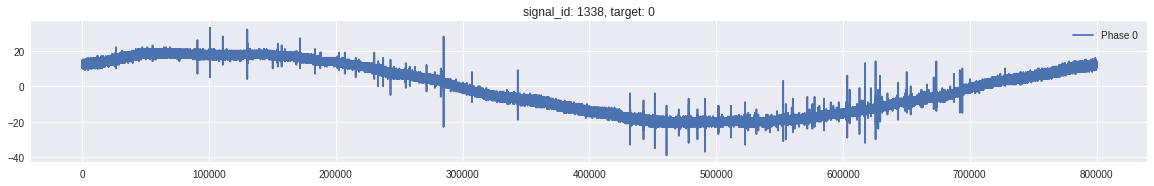

count    800000.000000
mean         -1.000294
std          13.909368
min         -39.000000
25%         -15.000000
50%          -1.000000
75%          13.000000
max          33.000000
Name: 1338, dtype: float64


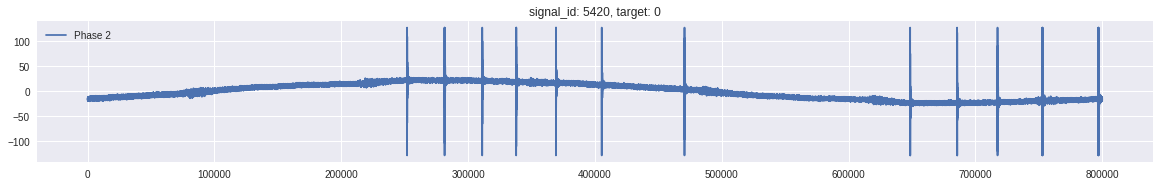

count    800000.000000
mean         -0.791294
std          15.801186
min        -128.000000
25%         -15.000000
50%          -1.000000
75%          14.000000
max         127.000000
Name: 5420, dtype: float64


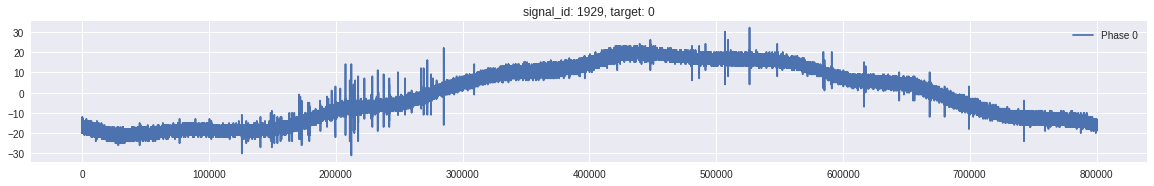

count    800000.000000
mean         -0.986416
std          13.626239
min         -31.000000
25%         -14.000000
50%          -1.000000
75%          12.000000
max          32.000000
Name: 1929, dtype: float64


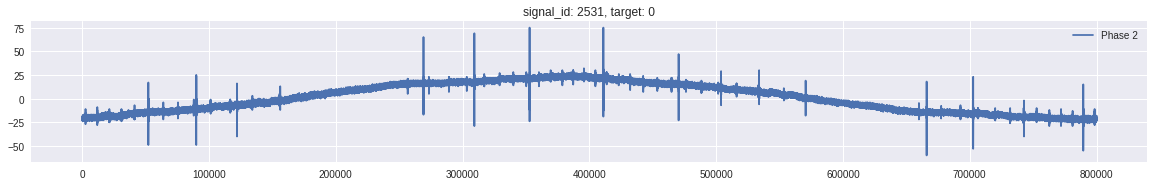

count    800000.000000
mean          0.898772
std          14.961028
min         -60.000000
25%         -14.000000
50%           1.000000
75%          16.000000
max          75.000000
Name: 2531, dtype: float64


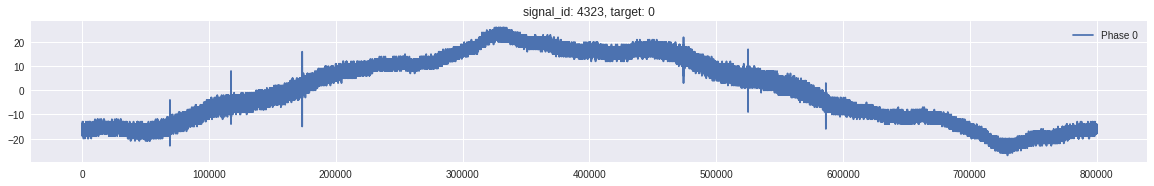

count    800000.000000
mean          0.016890
std          13.719636
min         -27.000000
25%         -13.000000
50%           0.000000
75%          13.000000
max          26.000000
Name: 4323, dtype: float64


In [ ]:
# Randomly select 5 signals with target=0 and plot the same
rand_plot(target_val=0, no_signals=5)

Observations:
* Signal ID: 1338
  *  Amplitude values vary from -39 units to +33 units, giving a range of 72 units.
  *  From sample number 400000 to sample number 7000000, we can see increase in the frequency of occurrences of very high fluctuations.
* Signal ID: 5420
  *  Amplitude values vary from -128 units to +127 units, giving a large range of 255 units.
  *  This large variation in the amplitude of the range of 255 can be seen in the samples between 200000 and 500000, and between 600000 and 800000
* Signal ID: 1929
  *  Amplitude values vary from -31 units to +32 units, giving a large range of 63 units.
  *  High fluctuations in the amplitude can be seen in the samples between 100000 and 300000.
* Signal ID: 2531 
  *  Amplitude values vary from -60 units to +75 units, giving a large range of 131 units.
  *  High fluctuations in the amplitude can be seen at almost every 100000 samples.
  *  There also exists harmonics of high amplitude fluctuations.
* Signal ID: 4323
  *  Amplitude values vary from -27 units to +26 units, giving a range of 53 units.
  *  There exists only 3 high fluctuations in the amplitude between 0 and 100000, and between 400000 and 600000 samples.

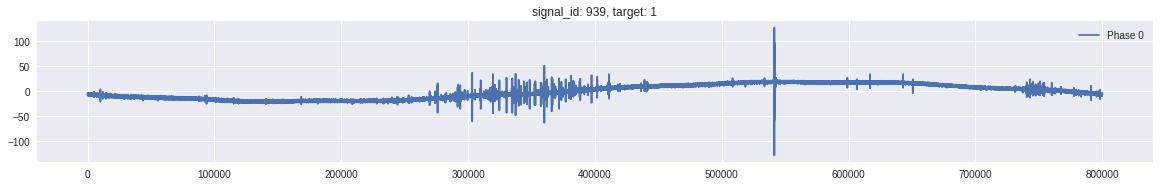

count    800000.000000
mean         -0.997569
std          13.764137
min        -128.000000
25%         -14.000000
50%          -1.000000
75%          12.000000
max         127.000000
Name: 939, dtype: float64


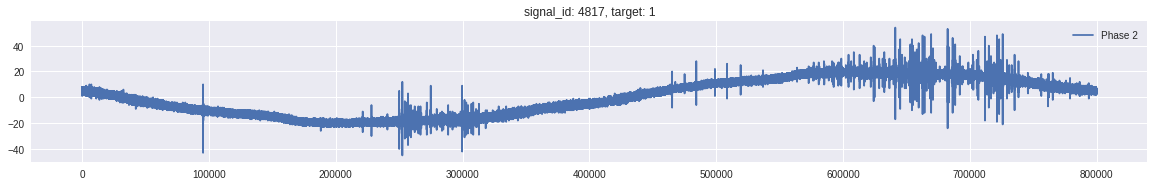

count    800000.000000
mean         -0.037684
std          13.869559
min         -45.000000
25%         -13.000000
50%           0.000000
75%          13.000000
max          54.000000
Name: 4817, dtype: float64


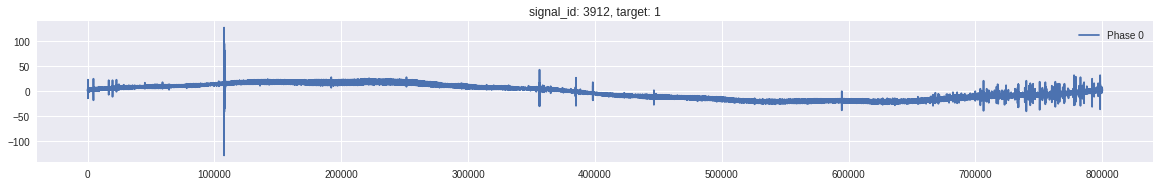

count    800000.000000
mean         -1.006220
std          14.073357
min        -128.000000
25%         -14.000000
50%          -1.000000
75%          12.000000
max         127.000000
Name: 3912, dtype: float64


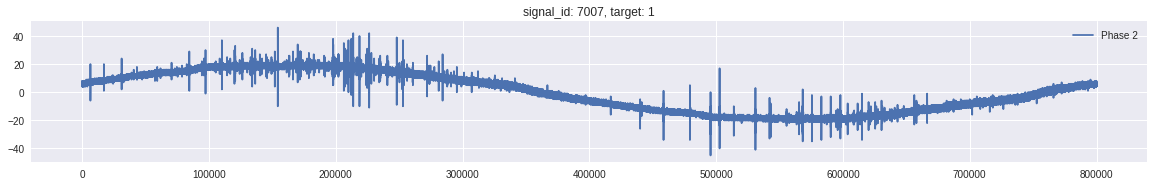

count    800000.000000
mean         -0.040620
std          13.592088
min         -45.000000
25%         -13.000000
50%           0.000000
75%          13.000000
max          46.000000
Name: 7007, dtype: float64


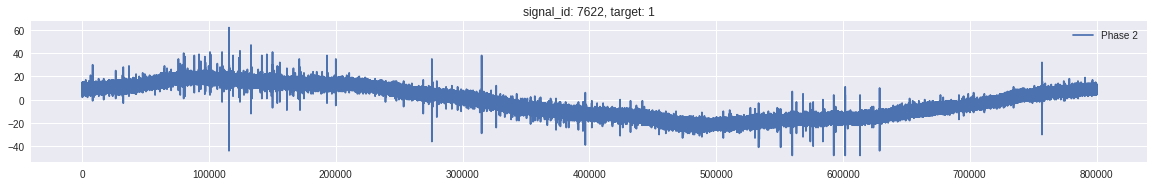

count    800000.000000
mean         -1.447964
std          13.187394
min         -48.000000
25%         -14.000000
50%          -2.000000
75%          11.000000
max          62.000000
Name: 7622, dtype: float64


In [ ]:
# Randomly select 5 signals with target=0 and plot the same
rand_plot(target_val=1, no_signals=5)

Observations:
* Signal ID: 939
  *  Amplitude values vary from -128 units to +127 units, giving a range of 255 units.
  *  Amplitude fluctuations of the range of 255 is observed in the samples between 500000 and 600000.
  *  There is a cluster of hight amplitude fluctuations between 300000 and 400000 samples.
* Signal ID: 4817
  *  Amplitude values vary from -45 units to +54 units, giving a large range of 99 units.
  *  There is small cluster of high amplitude fluctuation between 300000 and 400000 samples, and a large cluster of high amplitude fluctuation between 600000 and 800000 samples.
* Signal ID: 3912
  *  Amplitude values vary from -128 units to +127 units, giving a large range of 255 units.
  *  High amplitude fluctuation of 255 units is observed in the samples between 100000 and 200000.
  *  A small cluster of amplitude fluctuations is observed in 700000 and 800000 samples.
* Signal ID: 7007 
  *  Amplitude values vary from -45 units to +46 units, giving a large range of 91 units.
  *  Clusters of high amplitude fluctuations exists between 100000 and 300000 and 400000 and 700000 samples.
* Signal ID: 7622
  *  Amplitude values vary from -48 units to +62 units, giving a range of 110 units.
  *  Clusters of high amplitude fluctuations exists throughout the samples.

Conclusion:
* These are the signals whose target=0, and the extremely high fluctuations in the amplitude of the signals observed could be the false-hit-peaks, or peaks from the corona discharge, as specified in this [paper](https://www.dropbox.com/s/2ltuvpw1b1ms2uu/A%20Complex%20Classification%20Approach%20of%20Partial%20Discharges%20from%20Covered%20Conductors%20in%20Real%20Environment%20%28preprint%29.pdf?dl=0) which is shared by host of the competition.
* The signals that are selected whose target=1 looks more noisier than the signals that are selected whose target=0.
* Amongst the signals include patterns that are:
  *  Partial discharge like - which are required
  *  Corona dischare like - which are not required
  *  False hit peaks - which are not required
* Finding the required pattern by denoising the unwanted ones is the key to solving the problem.

#### Check Null & NA

In [ ]:
null_list = []

for i in range(train.shape[1]):
    null_list.append(train[str(i)].isnull().sum())
print("Number of Null values in train data is: {}".format(np.count_nonzero(null_list)))

Number of Null values in train data is: 0
